In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, r2_score
from sklearn.decomposition import PCA

import requests
from bs4 import BeautifulSoup

import pickle
import time

In [2]:
testinc = pd.read_csv('../data/testinc.csv')

In [4]:
testinc.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

### Modeling

### K Means Clustering

In [6]:
pd.set_option('display.max_columns', 35)
testinc.head()

,townstate,poverty,med_income,hs_completion,n_households,population,density,crime_rate,property_crime,violent_crime,students_per_teacher,gini,lat,lng,unemployment_rate,home_price,crime_rate_pc,vcrime_rate_pc,pcrime_rate_pc,people_per_household,state,preds,residuals
0,"Abbeville, Alabama",20.7,40186.0,79.1,2555,6055,12.2,62.0,51.0,11.0,13.000000,0.46135,31.60296,-85.21630,4.58761,86264.0,0.010239,0.001817,0.008423,2.369863,Alabama,103106.017089,16842.017089
1,"Abbeville, Louisiana",31.5,47483.0,70.7,9292,25897,42.4,591.0,474.0,117.0,14.875000,0.46135,29.89813,-92.19967,4.58761,129370.0,0.022821,0.004518,0.018303,2.787021,Louisiana,132736.201408,3366.201408
2,"Abbeville, South Carolina",39.9,34292.0,75.3,4925,13006,19.9,229.0,199.0,30.0,14.600000,0.46135,34.17875,-82.42871,4.58761,128638.0,0.017607,0.002307,0.015301,2.640812,South Carolina,92940.060425,-35697.939575
3,"Aberdeen, Idaho",13.8,43793.0,61.3,1127,3533,5.0,22.0,21.0,1.0,20.000000,0.46135,43.01939,-112.86185,4.58761,128794.0,0.006227,0.000283,0.005944,3.134871,Idaho,158927.403319,30133.403319
4,"Aberdeen, Maryland",17.2,60489.0,88.0,9538,24453,277.6,330.0,251.0,79.0,12.285714,0.41070,39.51075,-76.20061,3.70000,213991.0,0.013495,0.003231,0.010265,2.563745,Maryland,204127.397598,-9863.602402


In [7]:
testinc['log_density'] = np.log(testinc['density'])

In [8]:
features = [
    'med_income',
    'poverty',
    'hs_completion',
    'population',
    'density',
    #'log_density',
    'students_per_teacher',
    'gini',
    'crime_rate',
    'crime_rate_pc',
    'property_crime',
    'violent_crime',
    'unemployment_rate',
    'home_price'
]
X = testinc[features].copy()

In [9]:
X.corr()

,med_income,poverty,hs_completion,population,density,students_per_teacher,gini,crime_rate,crime_rate_pc,property_crime,violent_crime,unemployment_rate,home_price
med_income,1.000000,-0.667322,0.521329,0.327548,0.226592,0.105823,-0.122268,0.135994,-0.094674,0.154220,-0.007289,-0.217877,0.715272
poverty,-0.667322,1.000000,-0.596651,-0.140142,-0.140821,-0.056780,0.147579,-0.026673,0.080495,-0.045737,0.093062,0.201973,-0.357620
hs_completion,0.521329,-0.596651,1.000000,0.152299,0.066058,0.048625,-0.092610,0.072495,-0.022981,0.093543,-0.070927,-0.204912,0.295034
population,0.327548,-0.140142,0.152299,1.000000,0.287677,0.111295,-0.062801,0.655655,0.039584,0.653115,0.499741,-0.061357,0.234210
density,0.226592,-0.140821,0.066058,0.287677,1.000000,0.071847,0.135645,0.301118,0.123181,0.290070,0.287974,-0.000372,0.284547
students_per_teacher,0.105823,-0.056780,0.048625,0.111295,0.071847,1.000000,-0.030480,0.120092,0.052545,0.122078,0.077034,0.039557,0.149454
gini,-0.122268,0.147579,-0.092610,-0.062801,0.135645,-0.030480,1.000000,-0.011981,0.028268,-0.023485,0.059198,0.265483,0.014598
crime_rate,0.135994,-0.026673,0.072495,0.655655,0.301118,0.120092,-0.011981,1.000000,0.531496,0.994242,0.773357,0.022658,0.175484
crime_rate_pc,-0.094674,0.080495,-0.022981,0.039584,0.123181,0.052545,0.028268,0.531496,1.000000,0.530966,0.396069,0.073090,0.025619
property_crime,0.154220,-0.045737,0.093543,0.653115,0.290070,0.122078,-0.023485,0.994242,0.530966,1.000000,0.700967,0.009939,0.186891


In [10]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [11]:
km = KMeans(n_clusters = 2, random_state = 42)

In [12]:
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [13]:
testinc['cluster'] = km.labels_

In [14]:
centroids = testinc.groupby('cluster')[features].mean()
centroids

,med_income,poverty,hs_completion,population,density,students_per_teacher,gini,crime_rate,crime_rate_pc,property_crime,violent_crime,unemployment_rate,home_price
cluster,,,,,,,,,,,,,
0,50018.115227,18.981938,84.389956,8824.223822,75.344620,15.090822,0.457210,94.013424,0.01075,83.845741,10.167684,4.561231,151069.111159
1,61991.280366,16.322763,87.417151,35107.669545,537.095928,17.466040,0.455882,609.233909,0.02353,541.410518,67.823391,4.522725,287656.558485


In [15]:
ss.inverse_transform(km.cluster_centers_)

array([[5.00181152e+04, 1.89819380e+01, 8.43899561e+01, 8.82422382e+03,
        7.53446200e+01, 1.50908222e+01, 4.57210426e-01, 9.40134245e+01,
        1.07496417e-02, 8.38457408e+01, 1.01676837e+01, 4.56123069e+00,
        1.51069111e+05],
       [6.19912804e+04, 1.63227630e+01, 8.74171507e+01, 3.51076695e+04,
        5.37095928e+02, 1.74660399e+01, 4.55881918e-01, 6.09233909e+02,
        2.35303618e-02, 5.41410518e+02, 6.78233909e+01, 4.52272463e+00,
        2.87656558e+05]])

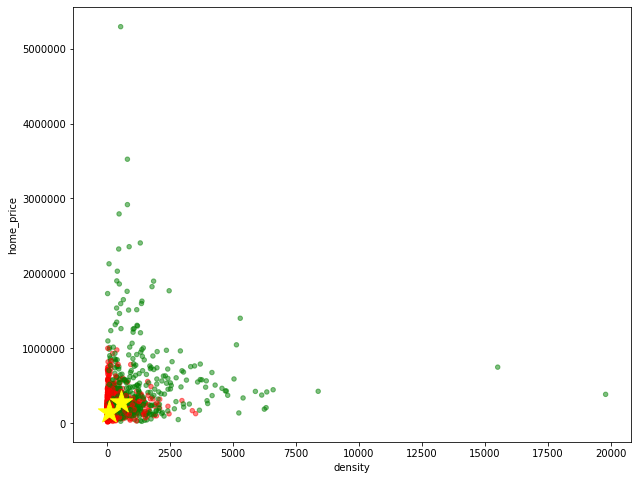

In [19]:
colors = ['red', 'green']
testinc['color'] = testinc['cluster'].map(lambda p: colors[p])

axis_1 = 'density'
axis_2 = 'home_price'

ax = testinc.plot(    
    kind = 'scatter', 
    x = axis_1, y = axis_2,
    figsize = (10,8),
    alpha = .5,
    c = testinc['color']
)

centroids.plot(
    kind = 'scatter', 
    x = axis_1, y = axis_2, 
    marker = '*', c = 'yellow', s = 550,
    ax = ax
);

In [20]:
silhouette_score(X_scaled, km.labels_)

0.36337632899453304

In [127]:
scores = []
for k in range(2, 30):
    cl = KMeans(n_clusters = k, random_state = 42)
    cl.fit(X_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_scaled, cl.labels_)
    scores.append((k, inertia, sil))

In [128]:
score_df = pd.DataFrame(scores, columns = ['k', 'inertia', 'sil'])
score_df.head()

,k,inertia,sil
0,2,55414.006188,0.363376
1,3,49229.350610,0.184653
2,4,44994.607122,0.171310
3,5,41800.322747,0.172641
4,6,39859.293797,0.171408


### Regression

In [21]:
pd.set_option('display.max_columns', 35)
testinc.head()

,townstate,poverty,med_income,hs_completion,n_households,population,density,crime_rate,property_crime,violent_crime,students_per_teacher,gini,lat,lng,unemployment_rate,home_price,crime_rate_pc,vcrime_rate_pc,pcrime_rate_pc,people_per_household,state,preds,residuals,log_density,cluster,color
0,"Abbeville, Alabama",20.7,40186.0,79.1,2555,6055,12.2,62.0,51.0,11.0,13.000000,0.46135,31.60296,-85.21630,4.58761,86264.0,0.010239,0.001817,0.008423,2.369863,Alabama,103106.017089,16842.017089,2.501436,0,red
1,"Abbeville, Louisiana",31.5,47483.0,70.7,9292,25897,42.4,591.0,474.0,117.0,14.875000,0.46135,29.89813,-92.19967,4.58761,129370.0,0.022821,0.004518,0.018303,2.787021,Louisiana,132736.201408,3366.201408,3.747148,1,green
2,"Abbeville, South Carolina",39.9,34292.0,75.3,4925,13006,19.9,229.0,199.0,30.0,14.600000,0.46135,34.17875,-82.42871,4.58761,128638.0,0.017607,0.002307,0.015301,2.640812,South Carolina,92940.060425,-35697.939575,2.990720,0,red
3,"Aberdeen, Idaho",13.8,43793.0,61.3,1127,3533,5.0,22.0,21.0,1.0,20.000000,0.46135,43.01939,-112.86185,4.58761,128794.0,0.006227,0.000283,0.005944,3.134871,Idaho,158927.403319,30133.403319,1.609438,0,red
4,"Aberdeen, Maryland",17.2,60489.0,88.0,9538,24453,277.6,330.0,251.0,79.0,12.285714,0.41070,39.51075,-76.20061,3.70000,213991.0,0.013495,0.003231,0.010265,2.563745,Maryland,204127.397598,-9863.602402,5.626181,1,green


In [43]:
testinc.shape

(5371, 26)

In [23]:
features = [
    'med_income',
    'poverty',
    'hs_completion',
    'density',
    'population',
    'students_per_teacher',
    'people_per_household',
    'lat',
    'lng',
    'crime_rate',
    'crime_rate_pc',
    'unemployment_rate',
    'gini',
]
X = testinc[features]
y = np.log(testinc['home_price'])

In [24]:
# pf = PolynomialFeatures()
# X_poly = pf.fit_transform(X)
X_poly = X.copy()

In [25]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_poly)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

In [27]:
rf = RandomForestRegressor(max_depth = 8, n_estimators = 25)
rf.fit(X_train, y_train)
#rf.score(X_test, y_test)
pred = np.exp(rf.predict(X_test))
r2_score(np.exp(y_test), pred)

0.8246183368841355

In [28]:
testinc['preds'] = np.exp(rf.predict(X_scaled))

In [29]:
testinc['residuals'] = testinc['preds'] - testinc['home_price']

In [30]:
testinc.head()

,townstate,poverty,med_income,hs_completion,n_households,population,density,crime_rate,property_crime,violent_crime,students_per_teacher,gini,lat,lng,unemployment_rate,home_price,crime_rate_pc,vcrime_rate_pc,pcrime_rate_pc,people_per_household,state,preds,residuals,log_density,cluster,color
0,"Abbeville, Alabama",20.7,40186.0,79.1,2555,6055,12.2,62.0,51.0,11.0,13.000000,0.46135,31.60296,-85.21630,4.58761,86264.0,0.010239,0.001817,0.008423,2.369863,Alabama,102424.577599,16160.577599,2.501436,0,red
1,"Abbeville, Louisiana",31.5,47483.0,70.7,9292,25897,42.4,591.0,474.0,117.0,14.875000,0.46135,29.89813,-92.19967,4.58761,129370.0,0.022821,0.004518,0.018303,2.787021,Louisiana,135674.790948,6304.790948,3.747148,1,green
2,"Abbeville, South Carolina",39.9,34292.0,75.3,4925,13006,19.9,229.0,199.0,30.0,14.600000,0.46135,34.17875,-82.42871,4.58761,128638.0,0.017607,0.002307,0.015301,2.640812,South Carolina,92600.441971,-36037.558029,2.990720,0,red
3,"Aberdeen, Idaho",13.8,43793.0,61.3,1127,3533,5.0,22.0,21.0,1.0,20.000000,0.46135,43.01939,-112.86185,4.58761,128794.0,0.006227,0.000283,0.005944,3.134871,Idaho,154038.413830,25244.413830,1.609438,0,red
4,"Aberdeen, Maryland",17.2,60489.0,88.0,9538,24453,277.6,330.0,251.0,79.0,12.285714,0.41070,39.51075,-76.20061,3.70000,213991.0,0.013495,0.003231,0.010265,2.563745,Maryland,201893.482466,-12097.517534,5.626181,1,green


In [31]:
testinc.sort_values(by = 'residuals', ascending = False).head().iloc[0]

townstate               San Marino, California
poverty                                    6.8
med_income                              152553
hs_completion                             96.9
n_households                              4684
population                               13538
density                                 1353.7
crime_rate                                 276
property_crime                             261
violent_crime                               15
students_per_teacher                     22.75
gini                                    0.5016
lat                                    34.1224
lng                                   -118.113
unemployment_rate                          5.2
home_price                         1.59908e+06
crime_rate_pc                        0.0203871
vcrime_rate_pc                      0.00110799
pcrime_rate_pc                       0.0192791
people_per_household                   2.89026
state                               California
preds        

In [74]:
testinc.to_csv('../data/testinc.csv')

In [10]:
# pickle model
pickle.dump(rf, open("cap.pkl", "wb"))

In [58]:
### Feature importance ###
# Residuals, missing data
# Feature relationships (student ratio is proxy for density?), education proxy for income?
# Joining data sources
# Ratio of crime types
# Under budget police towns have big erros
# Can model fill in blanks for places with non reported crimes?

In [185]:
pd.Series(rf.feature_importances_, features).sort_values()

crime_rate              0.002778
unemployment_rate       0.003437
poverty                 0.005699
students_per_teacher    0.005744
gini                    0.007319
crime_rate_pc           0.008158
people_per_household    0.009279
hs_completion           0.010504
lat                     0.026631
density                 0.038282
population              0.041084
lng                     0.231995
med_income              0.609090
dtype: float64

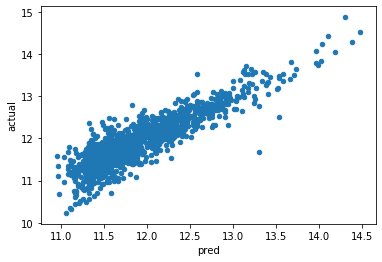

In [186]:
results = pd.DataFrame({
    "pred": rf.predict(X_test),
    "actual": y_test
})
results['pred'] = results['pred']
results['actual'] = results['actual']
results.plot(kind='scatter', x='pred', y='actual')

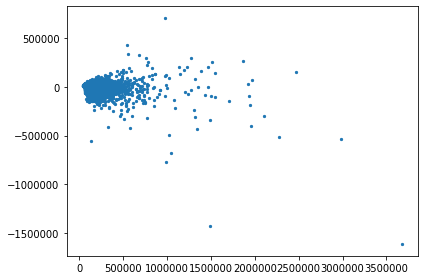

In [52]:
plt.scatter(x = testinc['preds'], y = testinc['residuals'], s = 5)
plt.tight_layout()

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#lr.score(X_train, y_train), lr.score(X_test, y_test)
pred = np.exp(lr.predict(X_test))
r2_score(np.exp(y_test), pred)

-0.23372337808457266

In [54]:
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.6355758611905618

In [55]:
rflr = pd.DataFrame(np.exp(lr.predict(X_test)), columns = ['lin_reg'])
rflr['ran_for'] = np.exp(rf.predict(X_test))
rflr['diff'] = rflr['lin_reg'] - rflr['ran_for']
rflr.head()

,lin_reg,ran_for,diff
0,106339.369609,93712.061559,12627.308050
1,113457.069146,118058.485470,-4601.416324
2,98166.717680,83690.534167,14476.183512
3,120272.218257,108037.406602,12234.811655
4,113316.787477,108273.633404,5043.154073


In [56]:
rflr.sort_values(by = 'diff')

,lin_reg,ran_for,diff
818,6.181118e+05,1.276016e+06,-6.579040e+05
107,5.836839e+05,1.140244e+06,-5.565598e+05
308,2.375255e+05,7.649410e+05,-5.274156e+05
1011,7.353120e+05,1.222171e+06,-4.868588e+05
291,2.735443e+05,7.424220e+05,-4.688777e+05
...,...,...,...
451,1.503506e+06,4.740830e+05,1.029423e+06
444,1.530718e+06,4.422660e+05,1.088452e+06
762,2.945374e+06,1.489374e+06,1.456000e+06
20,3.501962e+06,4.604119e+05,3.041550e+06


In [57]:
cross_val_score(rf, X, y, cv = 5)

array([0.78518938, 0.77381392, 0.79347941, 0.81838563, 0.78075682])

In [58]:
lr.coef_

array([ 0.36920365, -0.00608566,  0.04209934,  0.09325613,  0.0302751 ,
        0.0274148 , -0.03668776, -0.01504098, -0.15433573,  0.06128393,
       -0.0297573 , -0.01025537, -0.01853843])